In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp

In [2]:
def step_grad(x,y,learning_rate,m): 
    slope_m =np.zeros(len(x[0]),int)
    N = len(x)
    M= len(x[0])
    for j in range(M):
        for i in range(N):
            slope_m[j]+=(y[i]-(m*x[i]).sum())*x[i][j]    
    m_slope = m - learning_rate*slope_m*(-2/N)
    return m_slope

In [3]:
def gd(x,y,learning_rate,num_operations):
    n=len(x[0])
    m =np.zeros(n,int)
    for i in range(num_operations):
        m = step_grad(x,y,learning_rate,m)
#         print(i,"cost : ", cost(x,y,m))
        
    return m

In [4]:
# def cost(x,y,m):
#     ans = ((y-x.dot(m))**2).mean()
#     return ans

In [5]:
def run():
    data= np.loadtxt("0000000000002419_training_ccpp_x_y_train.csv",delimiter = ",")
    x = data[:,0:-1]
    scaler = pp.StandardScaler()
    scaler.fit(x)
    x_train = scaler.transform(x)
#     x_train = pp.scale(x)
    df = pd.DataFrame(x_train)
    y = data[:,-1]
    df['ones']=1
    x_train = df.to_numpy()
    learning_rate =0.42
    num_operations =42
#     num_operations =20
    m = gd(x_train,y,learning_rate,num_operations)
    return m
# print(run())
    
    

In [6]:
# run()

In [7]:
data = np.genfromtxt("0000000000002419_training_ccpp_x_y_train.csv",delimiter=',')
x_1 = data[:,:-1]
y = data[:,-1]
scaler = pp.StandardScaler()
scaler.fit(x_1)
x_new = scaler.transform(x_1)
df = pd.DataFrame(x_new)
df["O"] = 1
x = df.to_numpy()
from sklearn.linear_model import LinearRegression
alg = LinearRegression()
alg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
m = alg.coef_
c = alg.intercept_

In [9]:
dat= np.genfromtxt("original_test_cycle.csv", delimiter=",")
scaler = pp.StandardScaler()
scaler.fit(dat)
datt = scaler.transform(dat)
# datt = pp.scale(dat)
d = pd.DataFrame(datt)
d["New"] = 1
x_test = d.to_numpy()
x_test.shape


(2392, 5)

In [10]:
def pred(x,m):
    return x.dot(m)

y_pred = pred(x_test,run())
print(y_pred)

[470.38918441 472.12070181 432.97199301 ... 438.98051786 451.82831251
 447.49924432]


In [11]:
np.savetxt("0000000000002419_test_ccpp_x_test.csv",y_pred, delimiter =',', fmt='%1.10f')

In [12]:
y_pred_in = x_test.dot(m) + c
y_pred_in
print(y_pred_in.shape)

(2392,)


In [13]:
import matplotlib.pyplot as plt


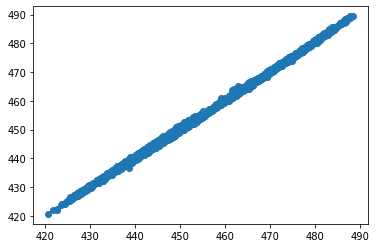

In [14]:
plt.scatter(y_pred,y_pred_in)